# __1. Import Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2. Dataset Overview__

In [2]:
raw_data = pd.read_csv('./abalone.data')

In [3]:
raw_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
raw_data.shape

(4177, 9)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
raw_data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# __3. Data Preperation__

In [7]:
# Copying the data
data = raw_data.copy(deep=True)

In [8]:
# data['Age'] = data['Rings'] * 1.50

In [9]:
# data['Age'].unique()

In [10]:
# data = data.drop(columns=['Rings'])

In [11]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
data[data['Height']==0.0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [14]:
data.drop([1257, 3996], axis=0, inplace=True)
data = data.reset_index(drop=True)

# __4. Data Exploration__

In [15]:
numcols = data.select_dtypes(include=np.number).columns
objcols = data.select_dtypes(include='object').columns

## __Missing Values__

In [16]:
if data.isnull().any() is True:
    print(data.isnull().sum())
else:
    print("There is no missing values present in this dataset")

There is no missing values present in this dataset


## __Duplicated Values__

In [17]:
if data.duplicated is True:
    print(data.drop_duplicates(inplace=True))
else:
    print("There is no duplicated values present in this dataset")

There is no duplicated values present in this dataset


## __Categorical Feature Distribution__

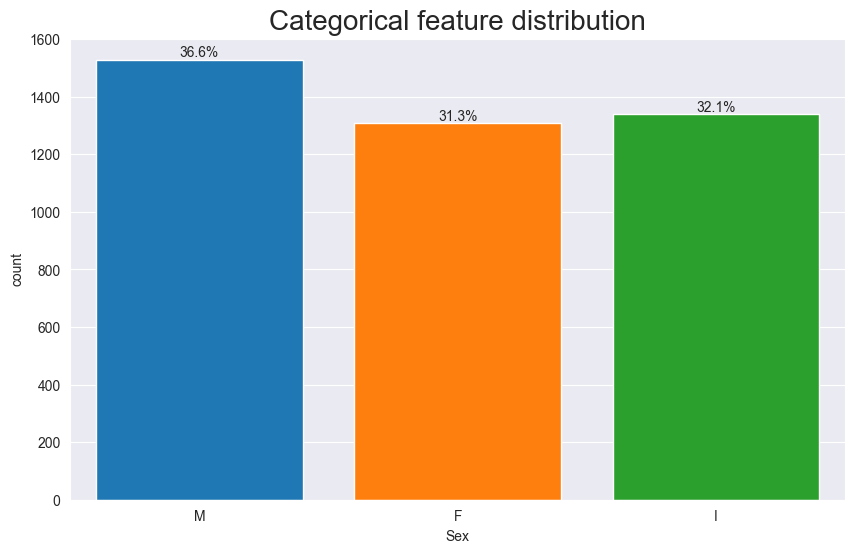

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
total = float(len(data))
ax = sns.countplot(data=data, x='Sex', saturation=2)
plt.title('Categorical feature distribution', size=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

## __Distrbution of Numerical Columns__

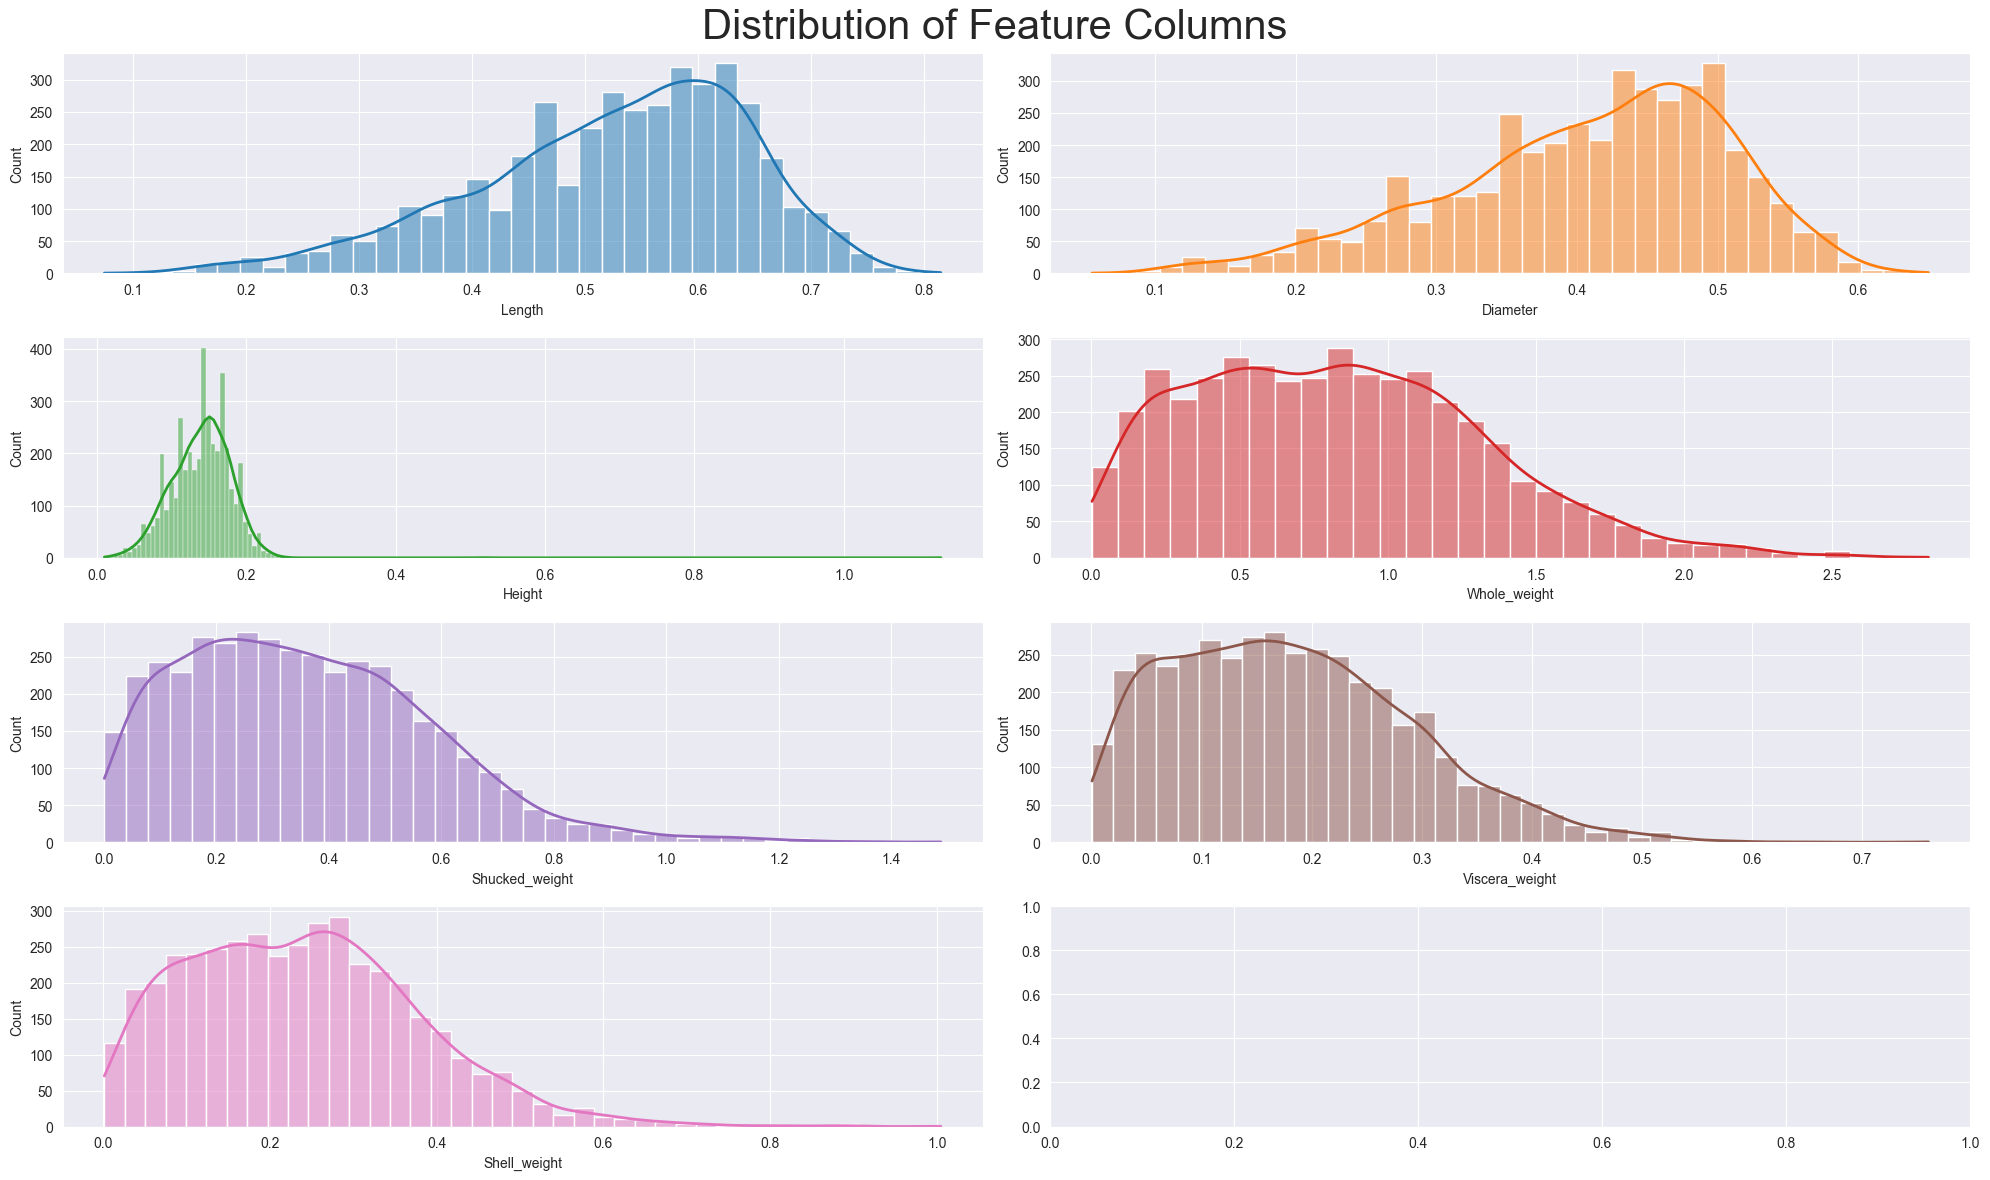

In [19]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,12))
axes = axes.flat
columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
'Viscera_weight', 'Shell_weight']
for index, column in enumerate(columns):
    graph = sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 2},
        alpha   = 0.5,
        ax      = axes[index]
)
plt.suptitle('Distribution of Feature Columns', size=30)
plt.tight_layout()
plt.show()

## __Finding Outliers__

In [20]:
numcols

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

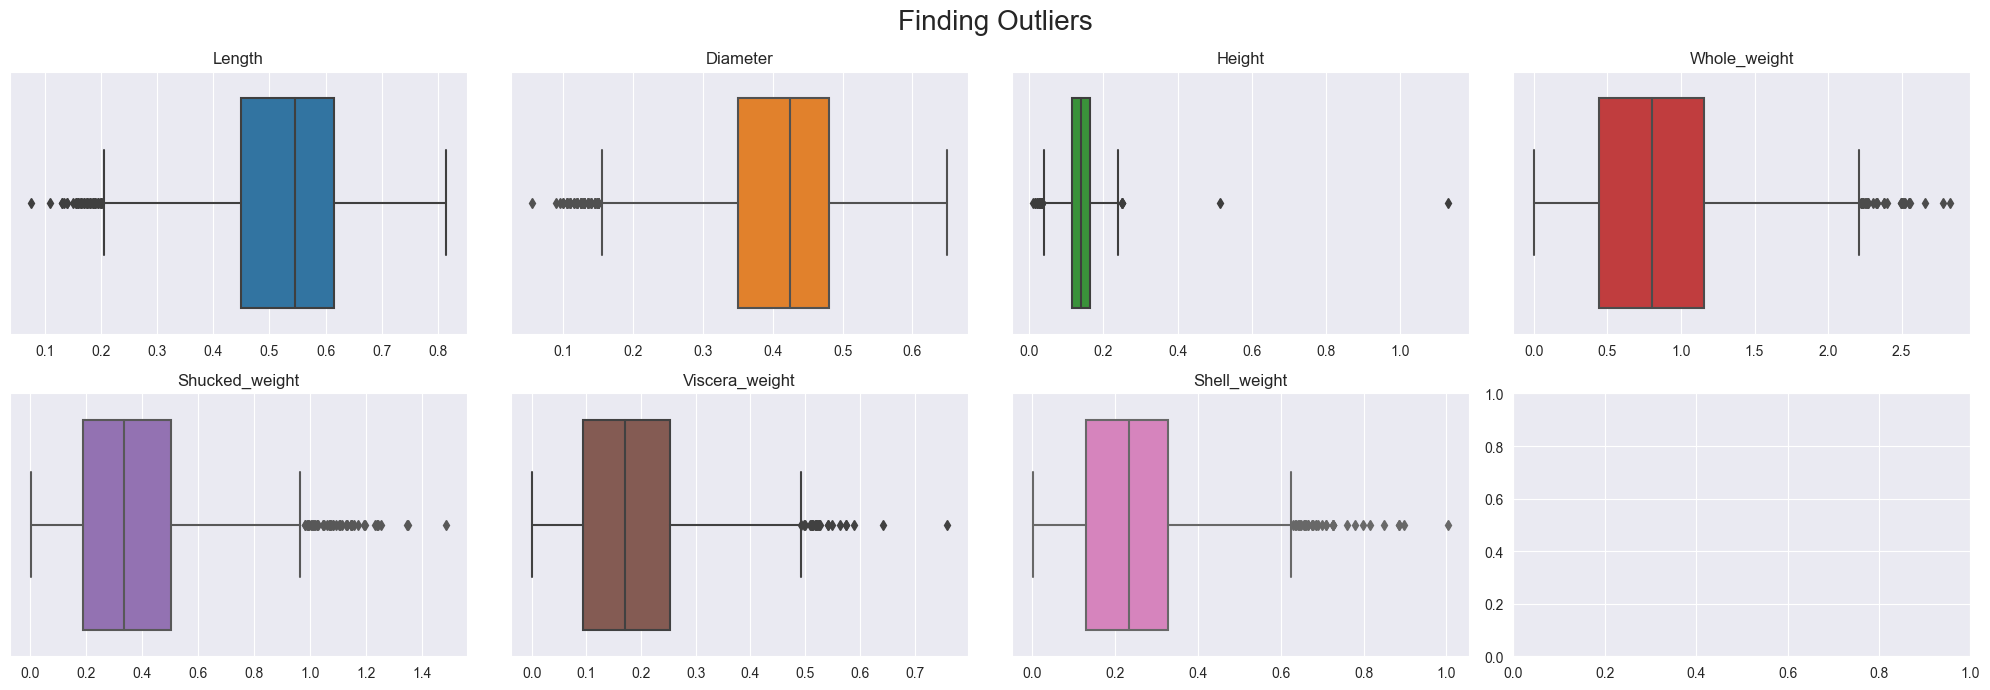

In [21]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,7))
axes = axes.flat
columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
'Viscera_weight', 'Shell_weight']
for index, column in enumerate(columns):
    sns.boxplot(
        data=data,
        x=column,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
        )
    axes[index].set_xlabel('')
    axes[index].set_title(column)
plt.suptitle('Finding Outliers', fontsize=20)
plt.tight_layout()

In [25]:
skew = {}
for col in columns:
    skewness = data[col].skew()
    skew[col]=skewness
    print(f"Skewness of {col}: {skewness}")

Skewness of Length: -0.6409931986718259
Skewness of Diameter: -0.6101815783839345
Skewness of Height: 3.166363670787667
Skewness of Whole_weight: 0.5305486492746151
Skewness of Shucked_weight: 0.7187350788436283
Skewness of Viscera_weight: 0.5914552358679017
Skewness of Shell_weight: 0.6210805257328209


In [ ]:
from sklearn.preprocessing import OrdinalEncoder #only on series
encode = OrdinalEncoder()
data[objcols] = encode.fit_transform(data[objcols].values)

# __5. Building Model__

## __5.1 Determine Features & Target Variables__

In [ ]:
X = data.drop(columns='Rings')
y = data.Rings

## __5.2 Split the dataset into Traing and Test sets__

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=True, train_size=0.7)

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (2922, 8)
xtest shape:  (1253, 8)
ytrain shape:  (2922,)
ytest shape:  (1253,)


## __5.3 Scale data using StandardScaler__

In [ ]:
# building the model

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.linear_model import Lasso, Ridge

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(model)
    print(dataframe)
    
    return model

In [ ]:
lr = select_model_predict(LinearRegression())

LinearRegression()
                    Value
Train Accuracy  53.503737
Test Accuracy   50.808780
